## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?


In [13]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)


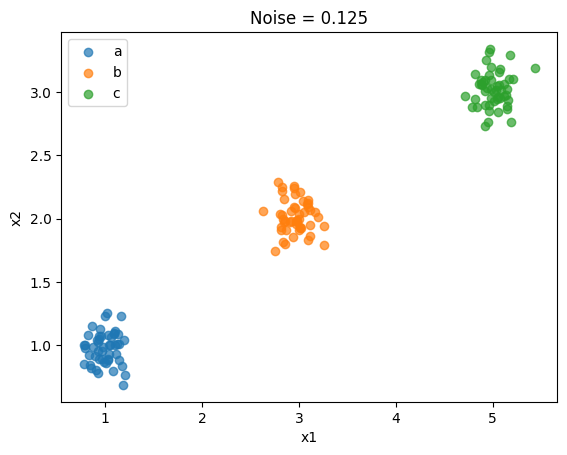

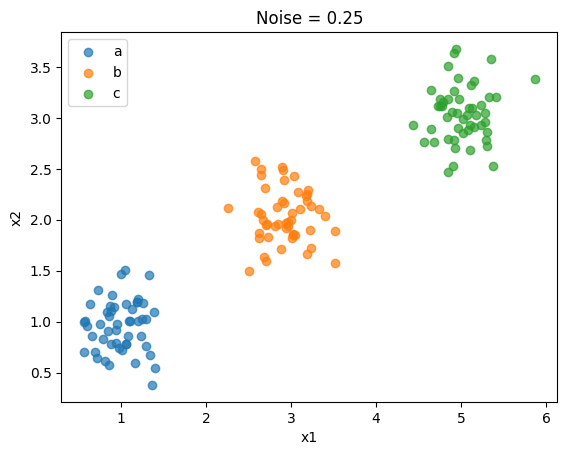

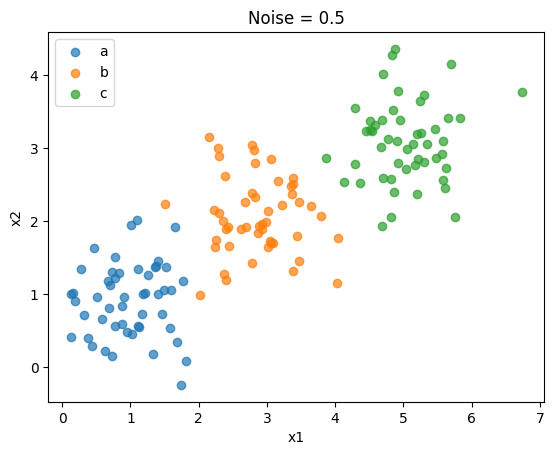

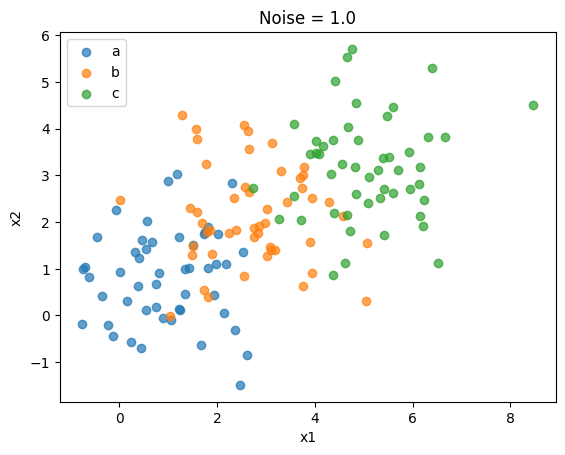

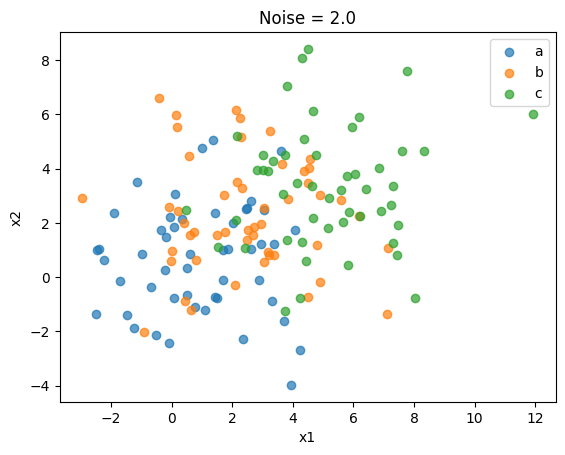

In [14]:
import matplotlib.pyplot as plt

def plot_scatter(df, title):
    plt.figure()
    for grp in df['group'].unique():
        sub = df[df['group'] == grp]
        plt.scatter(sub['x1'], sub['x2'], label=grp, alpha=0.7)
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

plot_scatter(df0_125, "Noise = 0.125")
plot_scatter(df0_25,  "Noise = 0.25")
plot_scatter(df0_5,   "Noise = 0.5")
plot_scatter(df1_0,   "Noise = 1.0")
plot_scatter(df2_0,   "Noise = 2.0")


-   As noise goes from 0.125 to 2.0**, the clusters become less visually distinct and ultimately may appear as one “blobby” cloud.

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)


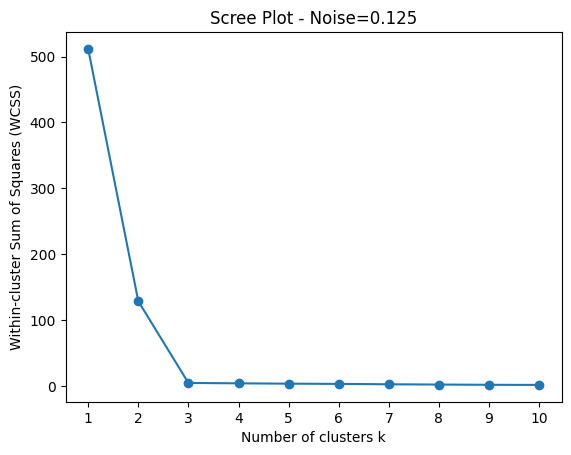

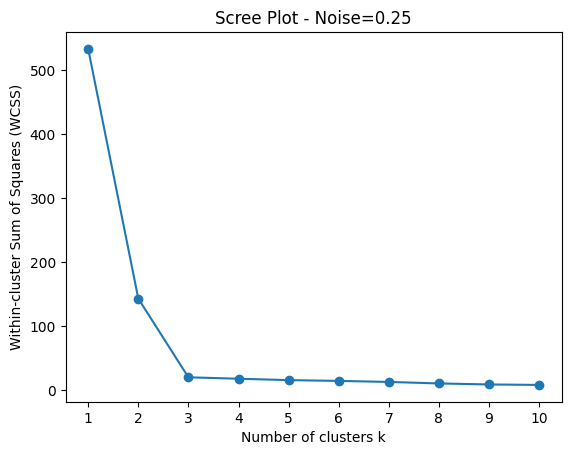

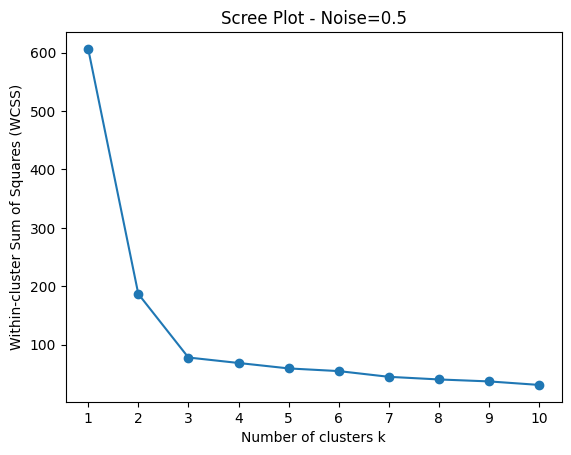

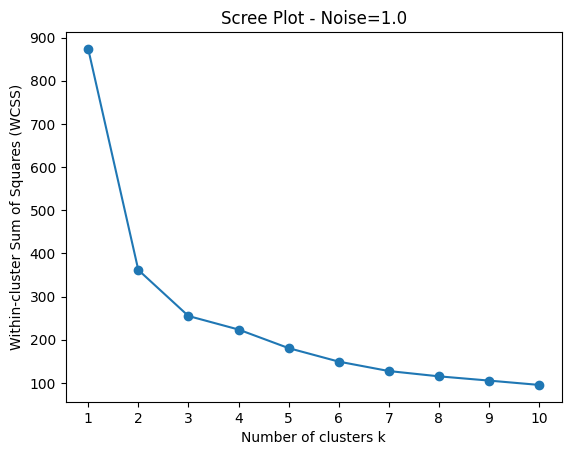

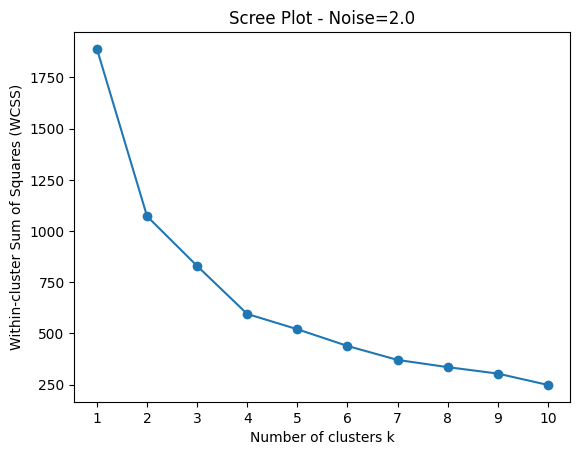

In [15]:
from sklearn.cluster import KMeans

def scree_plot(df, max_k=10, title="Scree Plot"):
    X = df[['x1','x2']].values
    wcss_list = []
    
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=123)
        kmeans.fit(X)
        wcss_list.append(kmeans.inertia_)  # .inertia_ is the WCSS
    
    plt.figure()
    plt.plot(range(1, max_k+1), wcss_list, marker='o')
    plt.title(title)
    plt.xlabel('Number of clusters k')
    plt.ylabel('Within-cluster Sum of Squares (WCSS)')
    plt.xticks(range(1, max_k+1))
    plt.show()

scree_plot(df0_125, title="Scree Plot - Noise=0.125")
scree_plot(df0_25,  title="Scree Plot - Noise=0.25")
scree_plot(df0_5,   title="Scree Plot - Noise=0.5")
scree_plot(df1_0,   title="Scree Plot - Noise=1.0")
scree_plot(df2_0,   title="Scree Plot - Noise=2.0")


-   low noise datasets have a pronounced elbow at k=3k=3. High noise datasets have a more gradual drop in WCSS, making it difficult to pick a single best kk.

4. Explain the intuition of the elbow, using this numerical simulation as an example.

-   The elbow corresponds to the point of diminishing returns in variance explained by an additional cluster. When noise is low, this point is sharp (and clearly observed at the true number of clusters). When noise is high, the within‐cluster variance remains large even with more clusters, so the elbow is less obvious.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

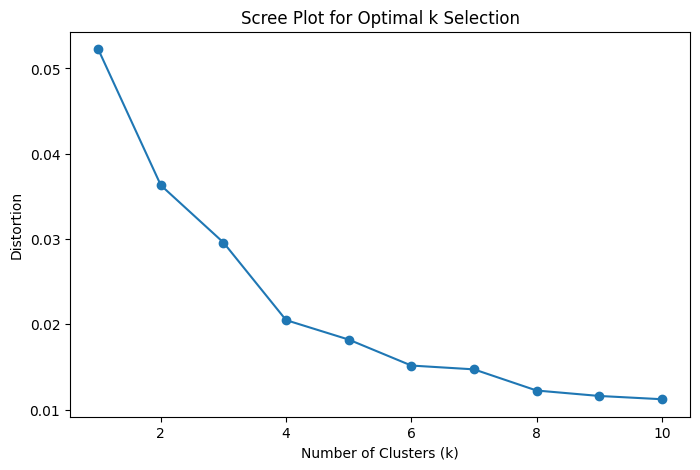

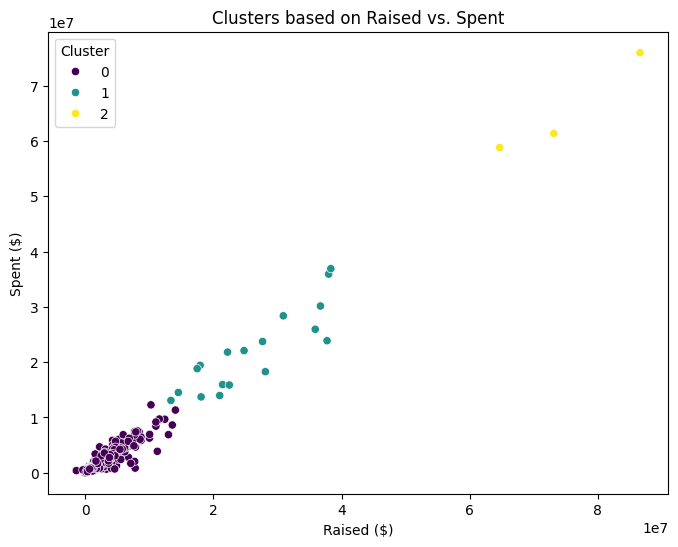

                     Member  Cluster_Raised_Spent
2               Adam Schiff                     1
87   Catherine Cortez Masto                     1
89            Chuck Schumer                     1
115            Dan Crenshaw                     1
261            John Kennedy                     1
290            Katie Porter                     1
298          Kevin McCarthy                     1
326           Maggie Hassan                     1
328             Marco Rubio                     1
340              Mark Kelly                     2
357          Michael Bennet                     1
390            Nancy Pelosi                     1
402            Patty Murray                     1
414               Rand Paul                     1
417         Raphael Warnock                     2
442             Ron Johnson                     1
476           Steve Scalise                     1
490                Ted Cruz                     1
499                Tim Ryan                     1


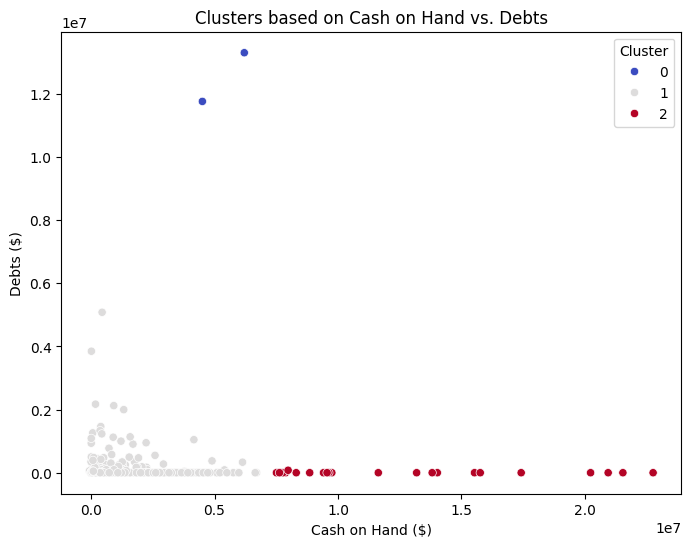

               Member  Cluster_Raised_Spent  Cluster_Cash_Debts  \
0  Abigail Spanberger                     0                   1   
1      Adam Kinzinger                     0                   1   
2         Adam Schiff                     1                   2   
3          Adam Smith                     0                   1   
4        Adrian Smith                     0                   1   

   Cluster_All_Variables  
0                      0  
1                      0  
2                      1  
3                      0  
4                      0  
                       Raised_norm  Spent_norm  Cash_on_Hand_norm  Debts_norm
Cluster_All_Variables                                                        
0                         0.040246    0.022856           0.053351    0.006409
1                         0.527704    0.474344           0.714618    0.000000
2                         0.169449    0.140189           0.319219    0.057512


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Load the dataset
file_path = "/home/hanyan/dev/clustering/assignment/data/2022 election cycle fundraising.csv"
df = pd.read_csv(file_path)

# Clean the dollar-denominated columns
dollar_cols = ['Raised', 'Spent', 'Cash on Hand', 'Debts']
for col in dollar_cols:
    df[col] = df[col].replace(r'[\$,]', '', regex=True).astype(float)

# Min-Max Normalize 'Raised' and 'Spent'
scaler = MinMaxScaler()
df[['Raised_norm', 'Spent_norm']] = scaler.fit_transform(df[['Raised', 'Spent']])

# Determine optimal k using a scree plot (elbow method)
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df[['Raised_norm', 'Spent_norm']])
    distortions.append(sum(np.min(cdist(df[['Raised_norm', 'Spent_norm']], kmeans.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

plt.figure(figsize=(8, 5))
plt.plot(K, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Scree Plot for Optimal k Selection')
plt.show()

# Apply k-means clustering
optimal_k = 3  # Adjust based on scree plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster_Raised_Spent'] = kmeans.fit_predict(df[['Raised_norm', 'Spent_norm']])

# Scatter plot of Raised vs. Spent, colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Raised', y='Spent', hue='Cluster_Raised_Spent', palette='viridis')
plt.xlabel('Raised ($)')
plt.ylabel('Spent ($)')
plt.title('Clusters based on Raised vs. Spent')
plt.legend(title='Cluster')
plt.show()

# Find smallest two clusters
cluster_sizes = df['Cluster_Raised_Spent'].value_counts()
smallest_clusters = cluster_sizes.nsmallest(2).index
smallest_cluster_politicians = df[df['Cluster_Raised_Spent'].isin(smallest_clusters)][['Member', 'Cluster_Raised_Spent']]
print(smallest_cluster_politicians)

# Repeat for Cash on Hand and Debts
df[['Cash_on_Hand_norm', 'Debts_norm']] = scaler.fit_transform(df[['Cash on Hand', 'Debts']])
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster_Cash_Debts'] = kmeans.fit_predict(df[['Cash_on_Hand_norm', 'Debts_norm']])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Cash on Hand', y='Debts', hue='Cluster_Cash_Debts', palette='coolwarm')
plt.xlabel('Cash on Hand ($)')
plt.ylabel('Debts ($)')
plt.title('Clusters based on Cash on Hand vs. Debts')
plt.legend(title='Cluster')
plt.show()

df[['Raised_norm', 'Spent_norm', 'Cash_on_Hand_norm', 'Debts_norm']] = scaler.fit_transform(df[['Raised', 'Spent', 'Cash on Hand', 'Debts']])

# Apply k-means clustering on all four numeric variables
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster_All_Variables'] = kmeans.fit_predict(df[['Raised_norm', 'Spent_norm', 'Cash_on_Hand_norm', 'Debts_norm']])


# Compare clusters
comparison = df[['Member', 'Cluster_Raised_Spent', 'Cluster_Cash_Debts', 'Cluster_All_Variables']]
print(comparison.head())

# Ensure only numeric columns are included in the groupby mean calculation
numeric_cols = ['Raised_norm', 'Spent_norm', 'Cash_on_Hand_norm', 'Debts_norm']
print(df.groupby('Cluster_All_Variables')[numeric_cols].mean())



- **Scree Plot Interpretation:** The scree plot suggests an elbow around `k=3`, indicating that three clusters are a reasonable choice for the k-means clustering.
- **Scatter Plot Analysis:**
    - Cluster `0`: Contains politicians who raised and spent relatively small amounts.
    - Cluster `1`: Includes those who raised and spent moderate amounts.
    - Cluster `2`: Consists of candidates who raised and spent extremely large sums, likely top Senate races or high-profile House races.
- **Smallest Clusters:** The smallest two clusters are likely `Cluster 2` (high fundraisers) and `Cluster 0` (low fundraisers). Among those in the smallest clusters:
    - **High-Fundraisers (`Cluster 2`)**: Mark Kelly, Raphael Warnock, Val Demings.
    - These candidates were involved in highly competitive Senate races, which explains their high fundraising and spending levels.

- **Scatter Plot Analysis:**
    - Most candidates cluster around having low debts and varying cash-on-hand levels.
    - A few outliers (Cluster 0) have significantly high debts.
- **Comparison with `Raised` vs. `Spent`:**
    - The clusters here appear to be more dispersed compared to the `Raised` vs. `Spent` clustering.
    - This indicates that while fundraising and spending are correlated, cash-on-hand and debts do not always follow the same pattern.
    - Candidates with high debts may not necessarily have been the highest fundraisers.

- **Cluster Patterns:**
    - **Cluster 0** (Low Fundraisers, Low Debts, Low Cash on Hand).
    - **Cluster 1** (Moderate to High Fundraisers, High Cash on Hand, and Minimal Debt).
    - **Cluster 2** (Candidates with higher fundraising, higher spending, and notable debts).
- **Comparison with Previous Clusters:**
    - Combining all four variables provides a more nuanced classification.
    - Candidates in `Cluster 2` appear to be the most financially aggressive, balancing high fundraising and spending, while also carrying notable debts.

- **Usefulness of k-Means Clustering:** The analysis successfully segmented candidates based on fundraising, spending, and financial management.
- **Key Observations:**
    - High-profile Senate races (e.g., Raphael Warnock, Mark Kelly, Val Demings) stand out in separate clusters due to their massive fundraising and spending.
    - Some candidates maintain large amounts of cash on hand, while others operate with substantial debt.
    - The segmentation helps understand the financial strategies of different types of candidates—whether they are heavy spenders, cautious fundraisers, or financially burdened.
- **Limitations:**
    - The clusters might be influenced by differences between Senate and House races.
    - Additional factors like district competitiveness and outside funding sources are not included in this analysis.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?